# 使用`pyfolio`与`alphalends`分析`Zipline`回测

主要用于整合回测结果分析及数据验算

## Imports
Import pyfolio and zipline, and ingest the pricing data for backtesting.

In [1]:
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
#warnings.filterwarnings('ignore')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 运行策略

In [2]:
%load_ext zipline

In [3]:
%%zipline --start 2016-1-1 --end 2018-5-18 -o algorithm.pkl

from zipline.api import *
from zipline.finance import commission, slippage

STOCKS = ['002024', '000333', '600771', '600645', '000002']

# 一次买入，持有到期，主要用于观察pyfolio计算结果

def initialize(context):
    context.stocks = [symbol(stock) for stock in STOCKS]
    set_commission(commission.PerShare(cost=0))
    set_slippage(slippage.FixedSlippage(spread=0))


def handle_data(context, data):
    for stock in context.stocks:
        hold = context.portfolio.positions[stock].amount
        if not hold:
            order_value(stock, 2000000)

[2018-05-20 11:14:26.335198] INFO: Performance: after split: asset: 美的集团(000333), amount: 100941, cost_basis: 20.89, last_sale_price: 32.99
[2018-05-20 11:14:26.336186] INFO: Performance: returning cash: 0.0
[2018-05-20 11:14:28.645162] INFO: zipline.finance.metrics.tracker: Simulated 578 trading days
first open: 2016-01-04 01:31:00+00:00
last close: 2018-05-18 07:00:00+00:00


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 05:35:00+00:00,NaN,0.000000e+00,NaN,-0.070206,NaN,NaN,0.00,1.000000e+07,0.000000e+00,0.000000e+00,...,0.0,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0
2016-01-05 07:00:00+00:00,2.492445e-15,2.220446e-16,5.380919e-14,-0.067603,0.819490,3.041457e-15,-6026995.96,3.973004e+06,6.026996e+06,6.026996e+06,...,0.0,0.0,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,2,"[{'amount': 163666, 'dt': 2016-01-05 07:00:00+...",0.0
2016-01-06 07:00:00+00:00,1.879369e-01,2.050559e-02,2.386975e+00,-0.051246,0.745908,1.586503e-01,0.00,3.973004e+06,6.232052e+06,6.232052e+06,...,0.0,0.0,0,NaN,3.973004e+06,6.026996e+06,6.026996e+06,3,[],0.0
2016-01-07 02:00:00+00:00,5.139338e-01,-3.558223e-02,1.461280e+00,-0.117026,0.738897,4.836583e-01,0.00,3.973004e+06,5.671174e+06,5.671174e+06,...,0.0,0.0,0,-4.975906,3.973004e+06,6.232052e+06,6.232052e+06,4,[],0.0
2016-01-08 07:00:00+00:00,5.006641e-01,-1.274276e-02,2.053863e+00,-0.099020,0.732421,5.214803e-01,0.00,3.973004e+06,5.899568e+06,5.899568e+06,...,0.0,0.0,0,-1.391562,3.973004e+06,5.671174e+06,5.671174e+06,5,[],0.0
2016-01-11 07:00:00+00:00,4.943066e-01,-4.675442e-02,1.647260e+00,-0.144346,0.684357,5.663141e-01,0.00,3.973004e+06,5.559452e+06,5.559452e+06,...,0.0,0.0,0,-4.518321,3.973004e+06,5.899568e+06,5.899568e+06,6,[],0.0
2016-01-12 07:00:00+00:00,4.513916e-01,-5.206956e-02,8.382628e-01,-0.138112,0.653811,5.223631e-01,0.00,3.973004e+06,5.506300e+06,5.506300e+06,...,0.0,0.0,0,-4.681648,3.973004e+06,5.559452e+06,5.559452e+06,7,[],0.0
2016-01-13 07:00:00+00:00,4.246843e-01,-7.171155e-02,3.766230e-01,-0.154148,0.605383,5.203251e-01,0.00,3.973004e+06,5.309880e+06,5.309880e+06,...,0.0,0.0,0,-5.875179,3.973004e+06,5.506300e+06,5.506300e+06,8,[],0.0
2016-01-14 07:00:00+00:00,4.151170e-01,-5.887866e-02,4.368298e-01,-0.136541,0.606174,5.249923e-01,0.00,3.973004e+06,5.438209e+06,5.438209e+06,...,0.0,0.0,0,-4.468502,3.973004e+06,5.309880e+06,5.309880e+06,9,[],0.0
2016-01-15 07:00:00+00:00,4.149815e-01,-9.077704e-02,6.251795e-02,-0.164105,0.577413,5.483951e-01,0.00,3.973004e+06,5.119226e+06,5.119226e+06,...,0.0,0.0,0,-6.028482,3.973004e+06,5.438209e+06,5.438209e+06,10,[],0.0


## 提取指标

从回测结果中获取收益率、头寸、交易数据

In [4]:
import pandas as pd

results = pd.read_pickle('algorithm.pkl')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [5]:
transactions.to_csv('transactions.csv')

## Single plot example
Make one plot of the top 5 drawdown periods.

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/numpy-1.14.3-py3.6-linux-x86_64.egg/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


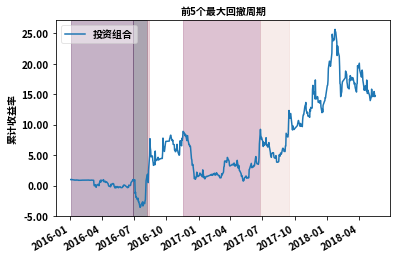

In [6]:
pf.plot_drawdown_periods(returns, top=5)

In [7]:
live_start_date = '2018-3-1'

## Full tear sheet example
Create a full tear sheet for our algorithm. As an example, set the live start date to something arbitrary.

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/numpy-1.14.3-py3.6-linux-x86_64.egg/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


最大回撤,净回撤百分比,波峰日期,波谷日期,回本日期,回本天数
0,444.67,2016-06-30,2016-07-19,2016-08-08,28
1,138.61,2016-01-06,2016-05-09,2016-06-30,127
2,91.58,2016-11-18,2017-05-08,2017-06-26,157
3,73.18,2016-08-09,2016-08-11,2016-08-12,4
4,58.51,2017-06-26,2017-08-14,2017-09-14,59


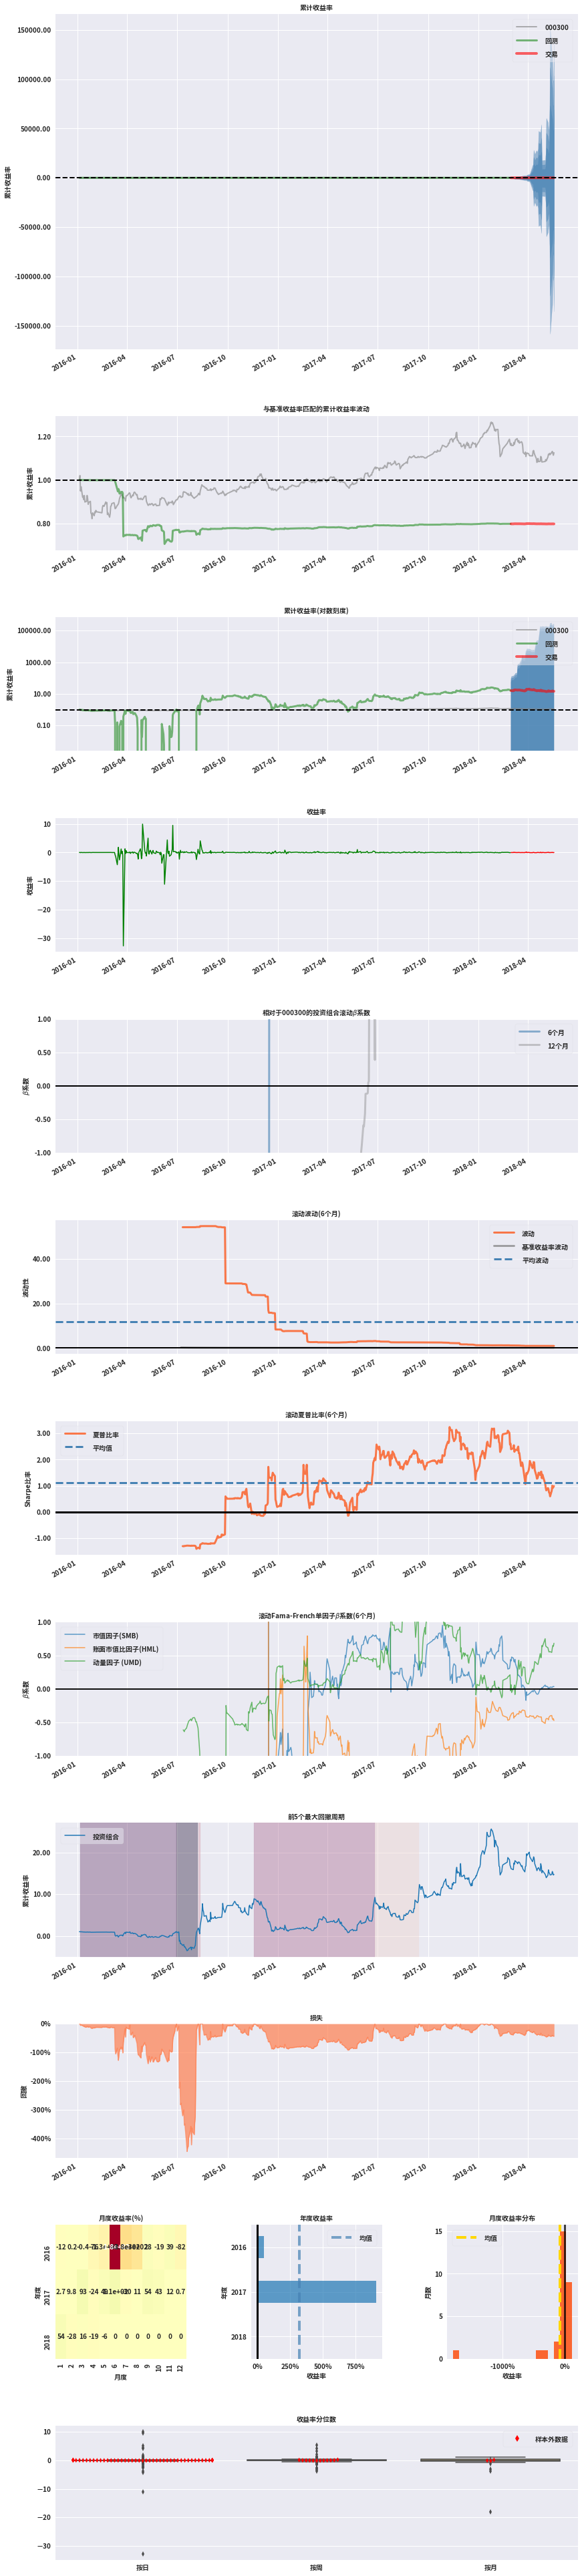

压力事件,mean,min,max
熔断机制,-0.22%,-5.50%,2.37%


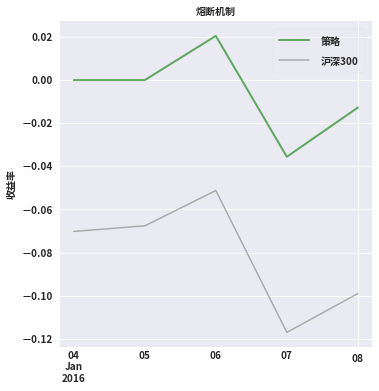

前十位多头头寸,max
sid,
600771,111336.20%
000002,4099.70%
000333,3927.16%
002024,3193.39%
600645,1961.17%


前十位空头头寸,max
sid,
600771,-56520.21%
000002,-3544.33%
000333,-1773.14%
002024,-1610.71%
600645,-1128.83%


前十位总头寸,max
sid,
600771,111336.20%
000002,4099.70%
000333,3927.16%
002024,3193.39%
600645,1961.17%


历史总头寸,max
sid,
600771,111336.20%
000002,4099.70%
000333,3927.16%
002024,3193.39%
600645,1961.17%


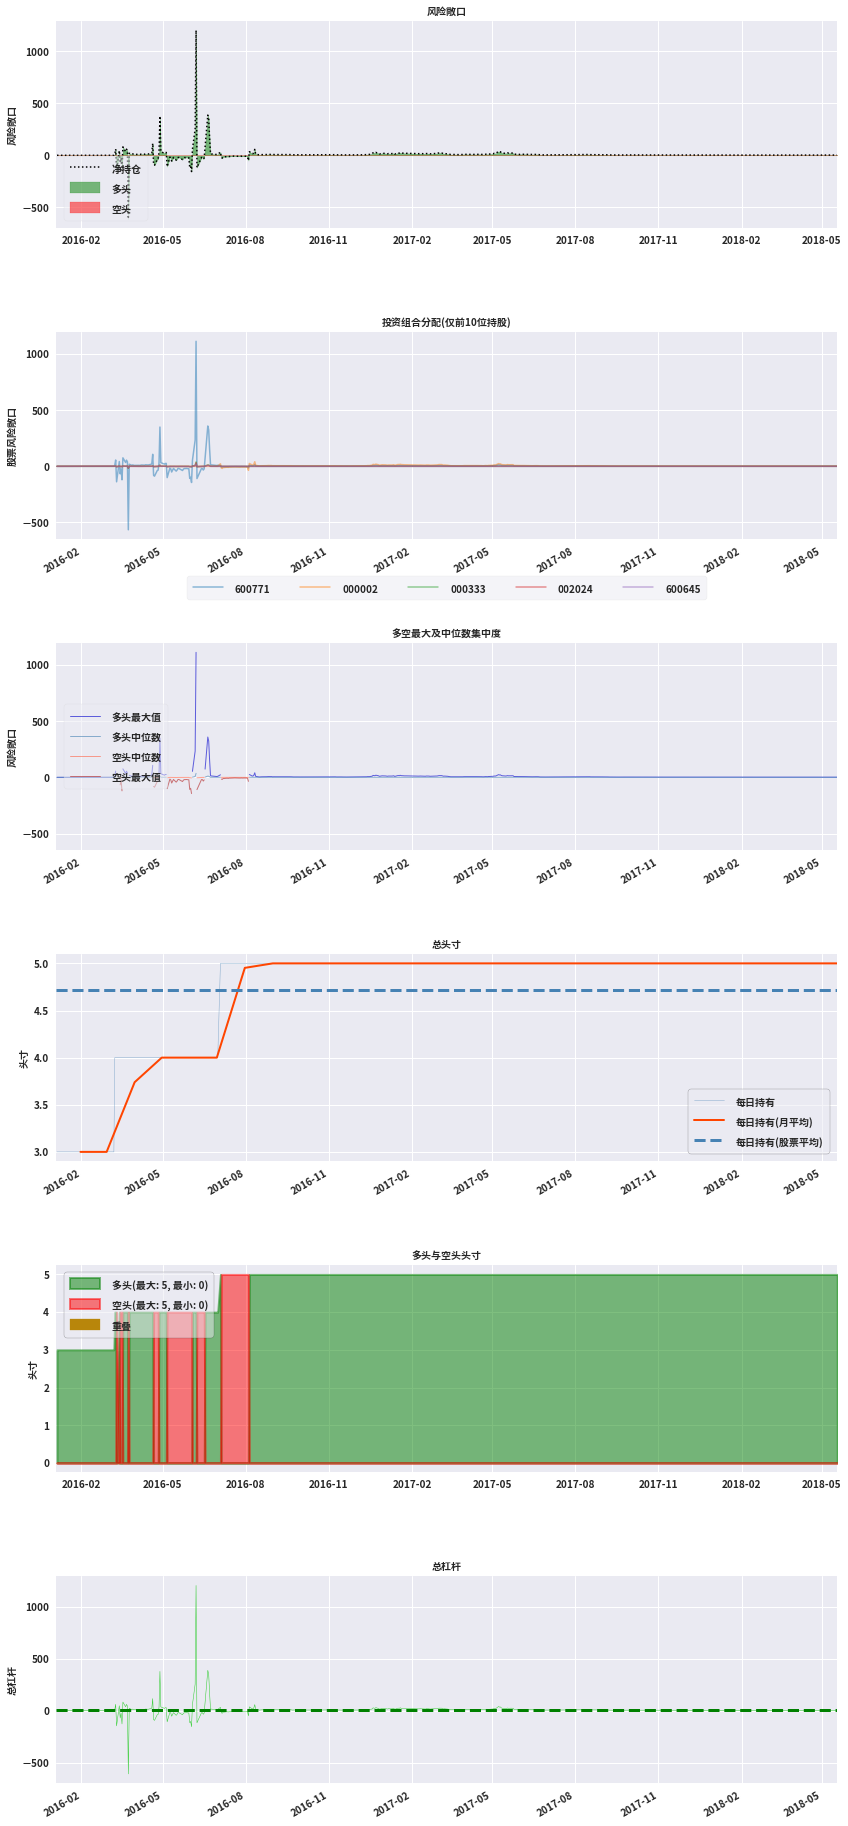

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


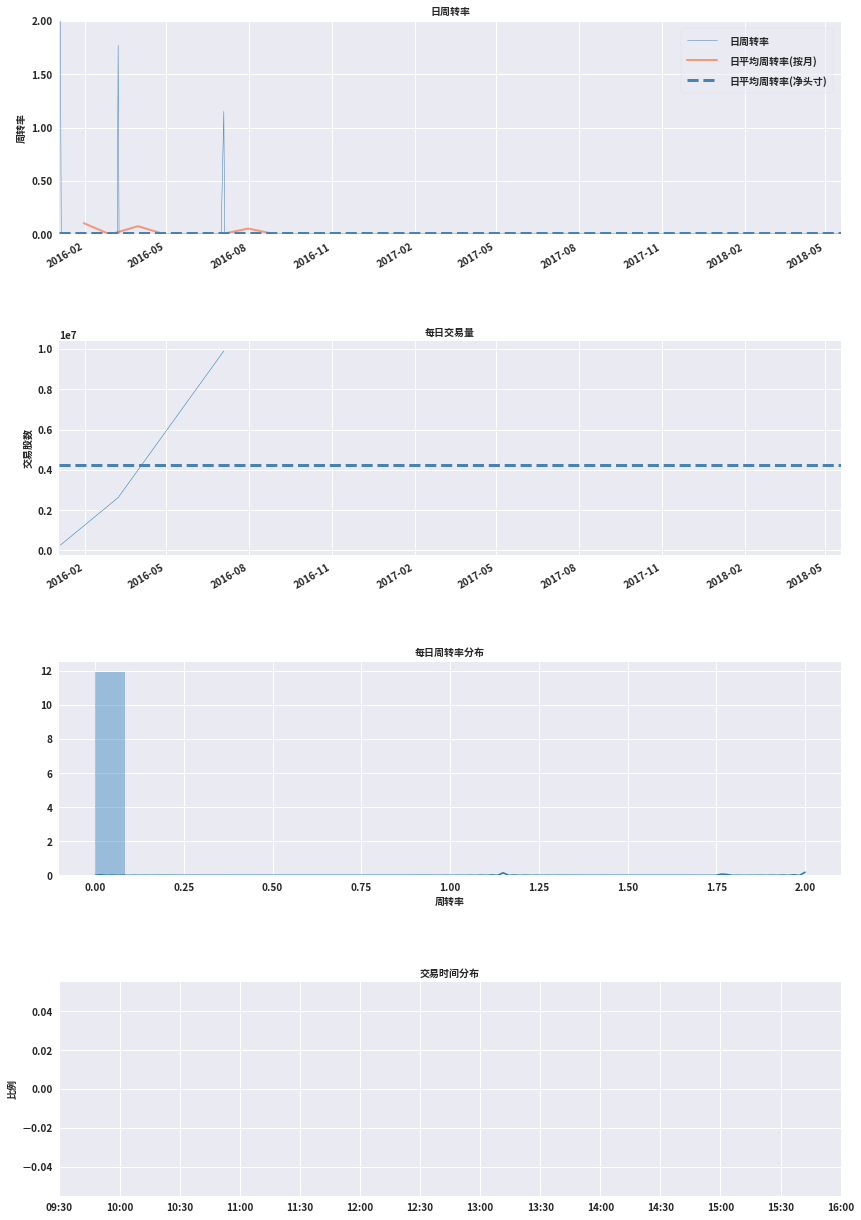

/home/ldf/pkg_source/czipline/src/pyfolio/pyfolio/round_trips.py:80: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  .agg(stats_dict)
/home/ldf/pkg_source/czipline/src/pyfolio/pyfolio/round_trips.py:88: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  .agg(stats_dict)
/home/ldf/pkg_source/czipline/src/pyfolio/pyfolio/round_trips.py:379: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  round_trips.groupby('symbol')['returns'].agg(RETURN_STATS).T


概要统计,所有交易,多头交易
完成交易总数,5.00,5.00
盈利比率,0.80,0.80
盈利次数,4.00,4.00
亏损次数,1.00,1.00
持平次数,0.00,0.00


盈亏统计,所有交易,多头交易
总利润,¥122283450.68,¥122283450.68
毛利润,¥123490417.10,¥123490417.10
毛亏损,¥-1206966.42,¥-1206966.42
盈亏因子,¥102.31,¥102.31
平均交易净利润,¥24456690.14,¥24456690.14
盈利交易平均值,¥30872604.28,¥30872604.28
亏损交易平均值,¥-1206966.42,¥-1206966.42
盈亏均值因子,¥25.58,¥25.58
交易最大盈利,¥68739116.46,¥68739116.46
交易最大亏损,¥-1206966.42,¥-1206966.42


周期统计,所有交易,多头交易
平均周期,814 days 17:00:01,814 days 17:00:01
中位数周期,863 days 17:00:01,863 days 17:00:01
最长周期,863 days 17:00:01,863 days 17:00:01
最短周期,682 days 17:00:01,682 days 17:00:01


收益率统计,所有交易,多头交易
所有已完成交易平均收益率,16.73%,16.73%
盈利交易平均收益率,21.12%,21.12%
亏损交易平均收益率,-0.83%,-0.83%
所有已完成交易中位数收益率,2.28%,2.28%
盈利交易中位数收益率,18.62%,18.62%
亏损交易中位数收益率,-0.83%,-0.83%
最大盈利率,47.03%,47.03%
最大亏损率,-0.83%,-0.83%


个股统计,000002,000333,002024,600645,600771
所有已完成交易平均收益率,34.97%,2.28%,0.21%,-0.83%,47.03%
盈利交易平均收益率,34.97%,2.28%,0.21%,nan%,47.03%
亏损交易平均收益率,nan%,nan%,nan%,-0.83%,nan%
所有已完成交易中位数收益率,34.97%,2.28%,0.21%,-0.83%,47.03%
盈利交易中位数收益率,34.97%,2.28%,0.21%,nan%,47.03%
亏损交易中位数收益率,nan%,nan%,nan%,-0.83%,nan%
最大盈利率,34.97%,2.28%,0.21%,-0.83%,47.03%
最大亏损率,34.97%,2.28%,0.21%,-0.83%,47.03%


个股盈利能力(合计PnL/PnL),
symbol,
600771,56.21%
000002,41.80%
000333,2.72%
002024,0.25%
600645,-0.99%


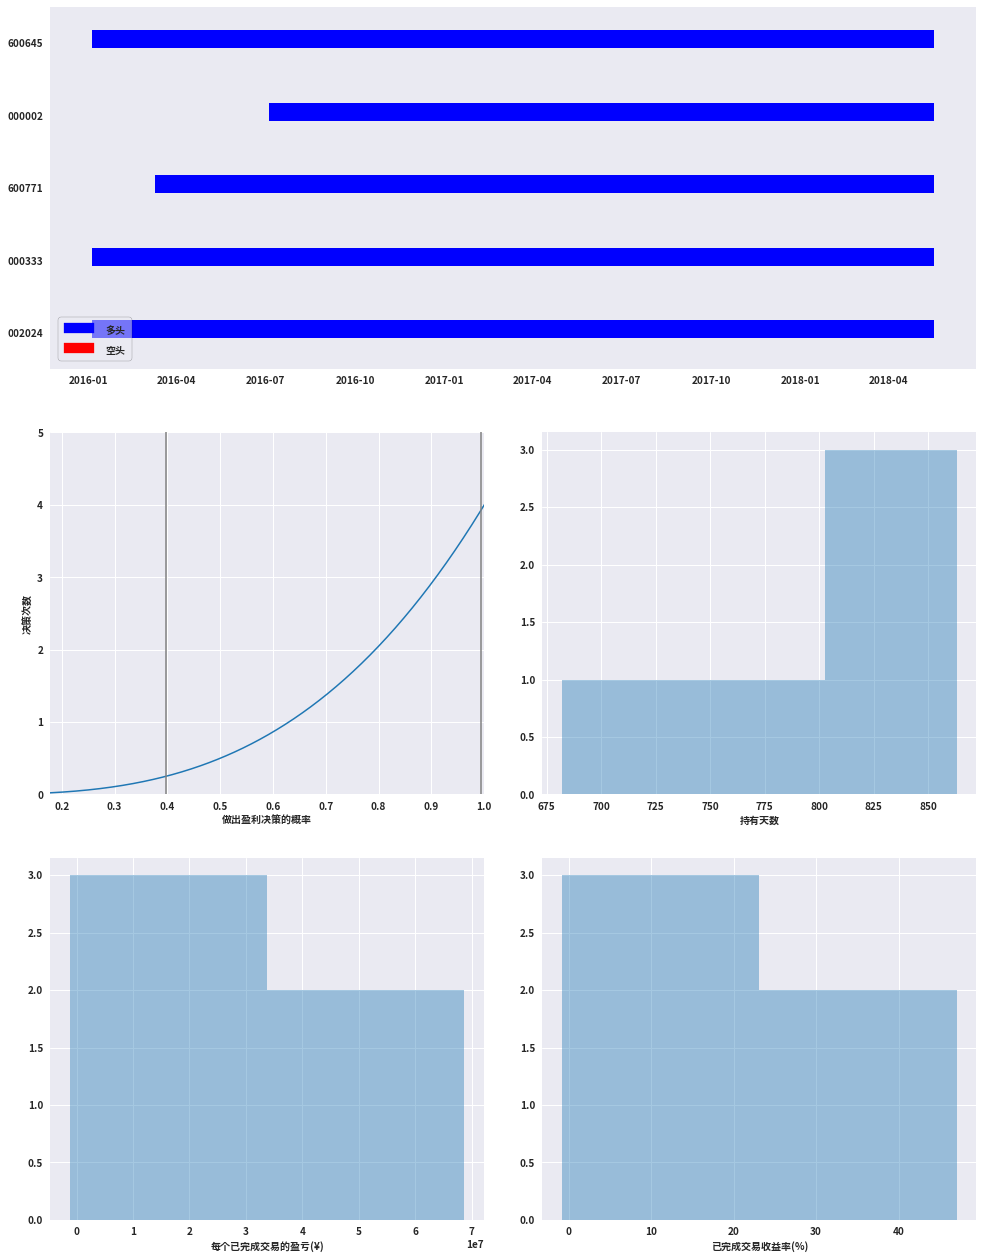

In [8]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date=live_start_date, round_trips=True)